<a href="https://colab.research.google.com/github/sushantkothari/Emotion-Detection/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="adVL984USQGOMK8LfmL3")
project = rf.workspace().project("emotion-detect-dis50")
model = project.version(1).model

# infer on a local image
print(model.predict("Happy.jpg", confidence=10, overlap=30).json())

# visualize your prediction
model.predict("Happy.jpg", confidence=10, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 299.5, 'y': 321.0, 'width': 293.0, 'height': 286.0, 'confidence': 0.9203476905822754, 'class': 'Happy', 'class_id': 4, 'detection_id': '47e4e0ec-f0a3-4d7c-836f-f2d6322fa0f1', 'image_path': 'Happy.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}


In [ ]:
from roboflow import Roboflow
import cv2

rf = Roboflow(api_key="adVL984USQGOMK8LfmL3")
project = rf.workspace().project("emotion-detect-dis50")
model = project.version(1).model

# infer on a local image
predictions = model.predict("Happy.jpg", confidence=10, overlap=30).json()

# Check if 'emotions' key exists and has values
if "emotions" in predictions and predictions["emotions"]:
    # Assuming only one face is detected
    first_face = predictions["emotions"][0]
    emotion = first_face["label"]
    face_bbox = first_face["box"]

    # Read the image
    image = cv2.imread("Happy.jpg")

    # Draw a rectangle around the face
    x, y, width, height = face_bbox
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Add emotion text
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save the image with the bounding box and emotion
    cv2.imwrite("prediction.jpg", image)


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from roboflow import Roboflow
import cv2
from IPython.display import display
from PIL import Image

rf = Roboflow(api_key="adVL984USQGOMK8LfmL3")
project = rf.workspace().project("emotion-detect-dis50")
model = project.version(1).model

# infer on a local image
predictions = model.predict("Happy.jpg", confidence=10, overlap=30).json()

# Check if 'emotions' key exists and has values
if "emotions" in predictions and predictions["emotions"]:
    # Assuming only one face is detected
    first_face = predictions["emotions"][0]
    emotion = first_face["label"]
    face_bbox = first_face["box"]

    # Read the image
    image = cv2.imread("Happy.jpg")

    # Draw a rectangle around the face
    x, y, width, height = face_bbox
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    # Add emotion text
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Save the image with the bounding box and emotion
    cv2.imwrite("prediction.jpg", image)


loading Roboflow workspace...
loading Roboflow project...


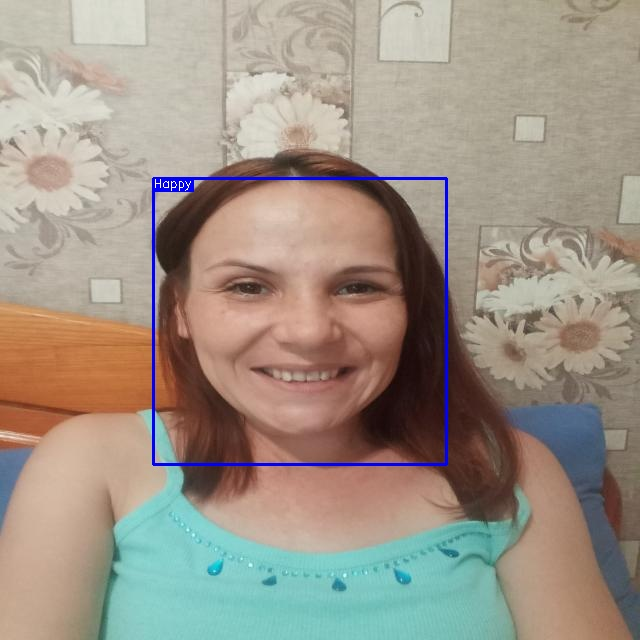

In [ ]:
from google.colab.patches import cv2_imshow

# Load the saved image and display it
predicted_image = cv2.imread("prediction.jpg")
cv2_imshow(predicted_image)
